In [114]:
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')
experiment_dir = 'E:/notebook/mlpractical/mlpractical-mlp2021-22-coursework2'

In [121]:
def collect_experiment_dicts(target_dir, test_flag=False):
    experiment_dicts = dict()
    for subdir, dir, files in os.walk(target_dir):
        for file in files:
            filepath = None
            if not test_flag:
                if file == 'summary.csv':
                    filepath = os.path.join(subdir, file)
                    print(subdir)
                    print(filepath)
            
            elif test_flag:
                if file == 'test_summary.csv':
                    filepath = os.path.join(subdir, file)
            
            if filepath is not None:
                
                with open(filepath, 'r') as read_file:
                    lines = read_file.readlines()
                current_experiment_dict = {key: [] for key in lines[0].replace('\n', '').split(',')}
                idx_to_key = {idx: key for idx, key in enumerate(lines[0].replace('\n', '').split(','))}
#                 print(lines)  # ['train_acc,train_loss,val_acc,val_loss\n', '\n', '0.034063157894736844,4.360666,0.0644,4.049858\n', '\n']
                for i in lines:
                    if i == '\n':
                        lines.remove(i)
#                 print(lines)
#                 for line in lines:
#                     line = line.strip('\n')
#                 print(lines)
                for line in lines[1:]:
                    line = line.strip('\n')
                    for idx, value in enumerate(line.replace('\n', '').split(',')):
                        current_experiment_dict[idx_to_key[idx]].append(float(value))
                
                experiment_dicts[subdir.split('\\')[-2]] = current_experiment_dict
                
    return experiment_dicts
                
            

In [122]:
result_dict = collect_experiment_dicts(target_dir=experiment_dir)
for key, value in result_dict.items():
    print(key, list(value.keys()))

E:/notebook/mlpractical/mlpractical-mlp2021-22-coursework2\VGG_07\result_outputs
E:/notebook/mlpractical/mlpractical-mlp2021-22-coursework2\VGG_07\result_outputs\summary.csv
E:/notebook/mlpractical/mlpractical-mlp2021-22-coursework2\VGG_08\result_outputs
E:/notebook/mlpractical/mlpractical-mlp2021-22-coursework2\VGG_08\result_outputs\summary.csv
E:/notebook/mlpractical/mlpractical-mlp2021-22-coursework2\VGG_08_experiment\result_outputs
E:/notebook/mlpractical/mlpractical-mlp2021-22-coursework2\VGG_08_experiment\result_outputs\summary.csv
E:/notebook/mlpractical/mlpractical-mlp2021-22-coursework2\VGG_37\result_outputs
E:/notebook/mlpractical/mlpractical-mlp2021-22-coursework2\VGG_37\result_outputs\summary.csv
E:/notebook/mlpractical/mlpractical-mlp2021-22-coursework2\VGG_38\result_outputs
E:/notebook/mlpractical/mlpractical-mlp2021-22-coursework2\VGG_38\result_outputs\summary.csv
E:/notebook/mlpractical/mlpractical-mlp2021-22-coursework2\VGG_38_experiment\result_outputs
E:/notebook/mlpr

In [123]:
result_dict

{'VGG_07': {'train_acc': [0.034063157894736844],
  'train_loss': [4.360666],
  'val_acc': [0.0644],
  'val_loss': [4.049858]},
 'VGG_08': {'train_acc': [0.010694736842105264,
   0.03562105263157895,
   0.0757684210526316,
   0.10734736842105265,
   0.13741052631578948,
   0.16888421052631578,
   0.1941263157894737,
   0.21861052631578948,
   0.24134736842105264,
   0.26399999999999996,
   0.27898947368421056,
   0.29532631578947366,
   0.31138947368421044,
   0.3236842105263158,
   0.33486315789473686,
   0.3462526315789474,
   0.35381052631578946,
   0.36157894736842106,
   0.36774736842105266,
   0.37753684210526317,
   0.38597894736842114,
   0.3912421052631579,
   0.39840000000000003,
   0.4036,
   0.4105263157894737,
   0.41501052631578944,
   0.4193263157894737,
   0.4211578947368421,
   0.4260842105263159,
   0.4313684210526315,
   0.4370526315789474,
   0.439642105263158,
   0.4440842105263158,
   0.44696842105263157,
   0.4518105263157895,
   0.45298947368421055,
   0.46021052

In [124]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def plot_result_graphs(plot_name, stats, keys_to_plot, notebook=True):
    
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for name in keys_to_plot:
        for k in ['train_loss', 'val_loss']:
            item = stats[name][k]
            ax_1.plot(np.arange(0, len(item)), 
                      item, label='{}_{}'.format(name, k))
            
    ax_1.legend(loc=0)
    ax_1.set_ylabel('Loss')
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for name in keys_to_plot:
        for k in ['train_acc', 'val_acc']:
            item = stats[name][k]
            ax_2.plot(np.arange(0, len(item)), 
                      item, label='{}_{}'.format(name, k))
            
    ax_2.legend(loc=0)
    ax_2.set_ylabel('Accuracy')
    ax_2.set_xlabel('Epoch number')
    
    fig_1.savefig('../data/{}_loss_performance.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='pdf',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
    
    fig_2.savefig('../data/{}_accuracy_performance.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='pdf',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
    
    

c:\users\neko_maru~\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:35: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
c:\users\neko_maru~\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:35: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
c:\users\neko_maru~\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:40: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
c:\users\neko_maru~\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:40: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument

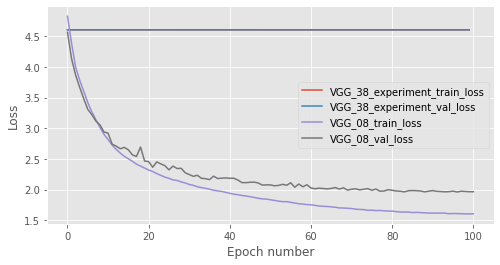

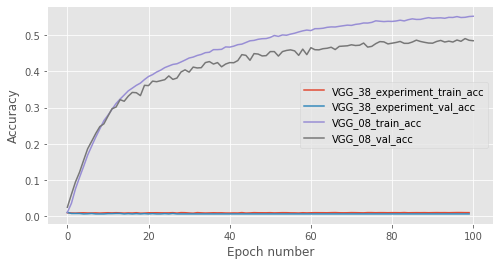

In [127]:
plot_result_graphs('problem_model', result_dict, keys_to_plot=['VGG_38_experiment', 'VGG_08'])